<a href="https://colab.research.google.com/github/mardocheeogecime-gif/Rede_Colabora-o_Acad-mica_ECI_UFMG/blob/main/Rede_Colabora%C3%A7%C3%A3o_Acad%C3%AAmica_ECI_UFMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 38.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

<ipython-input-2-6b358d3f52ef>:146: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(comunidades))


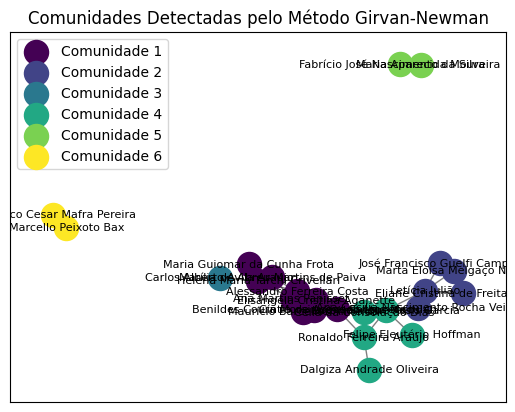

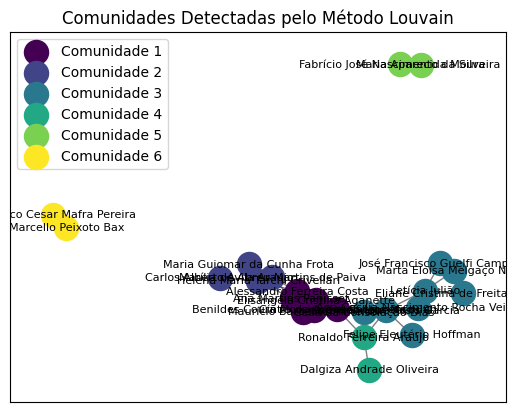

Tempo total de execução: 101.76 segundos


<ipython-input-2-6b358d3f52ef>:263: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


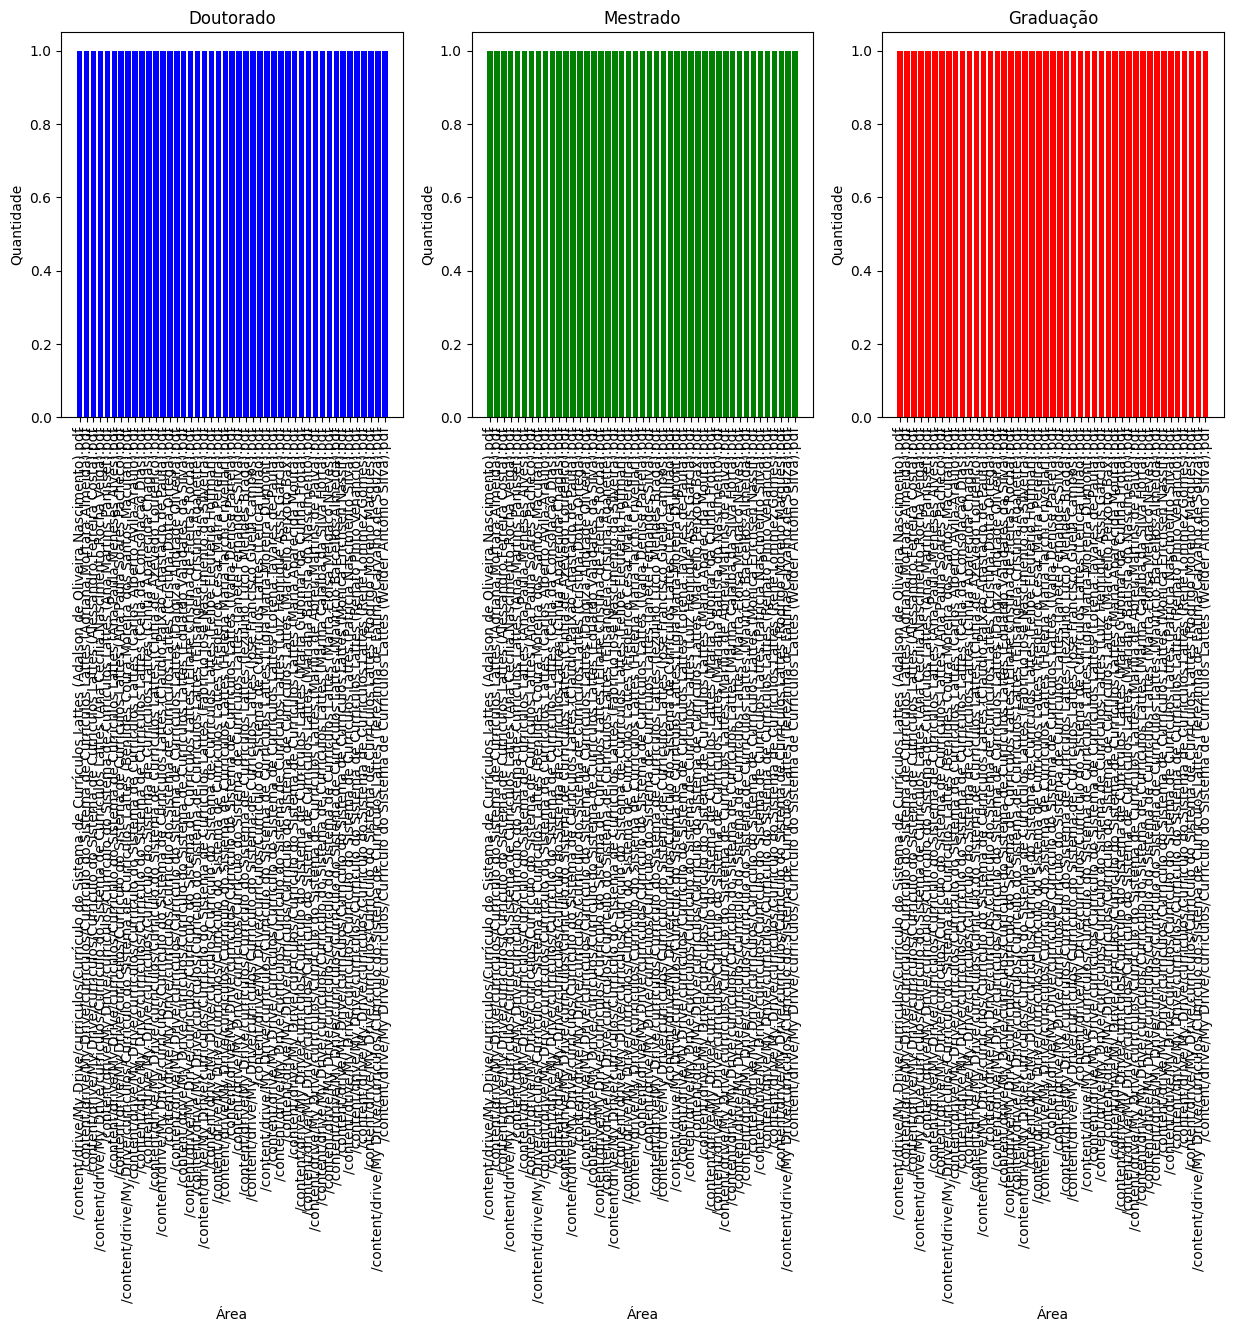

Top 5 pessoas com mais colaborações:
Cíntia de Azevedo Lourenço: 9 colaborações
Alessandro Ferreira Costa: 8 colaborações
Ana Martins Panisset: 8 colaborações
Luiz Henrique Assis Garcia: 7 colaborações
Helena Maria Tarchi Crivellari: 6 colaborações


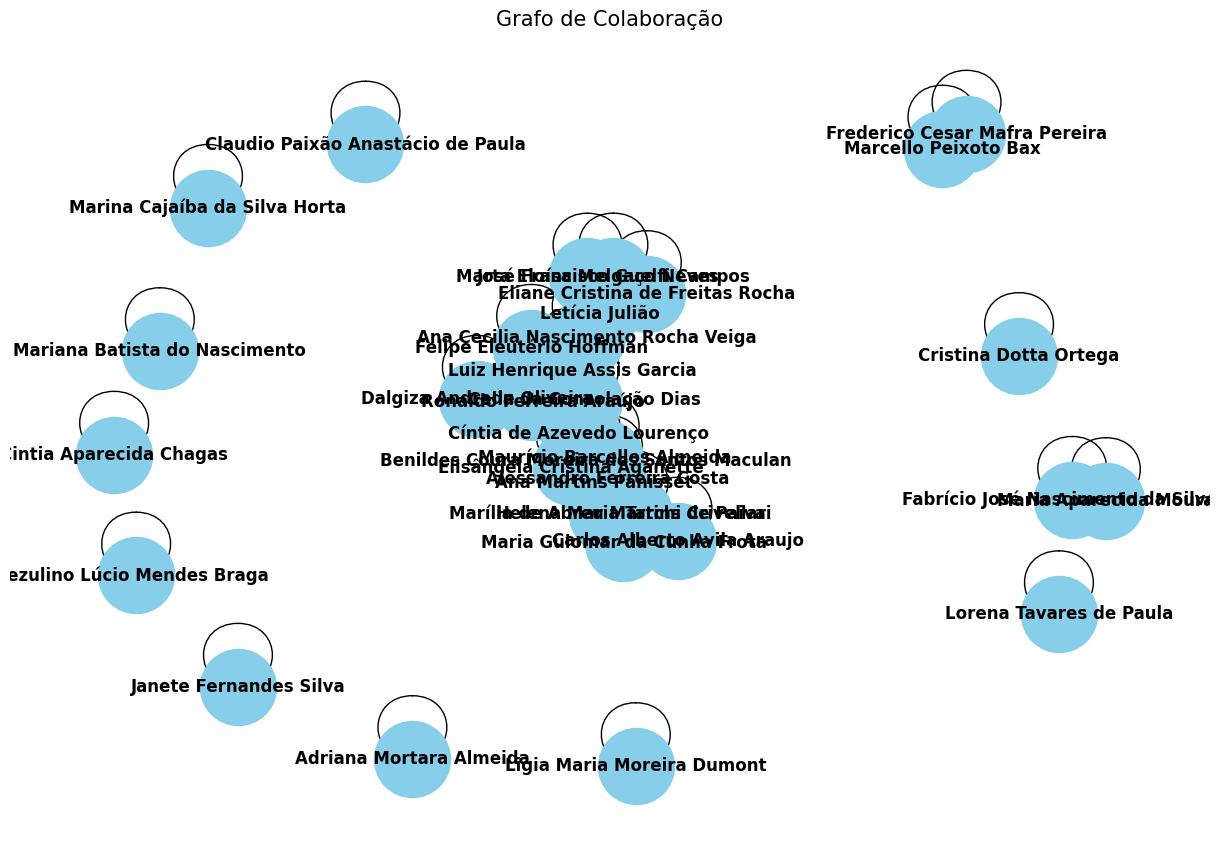

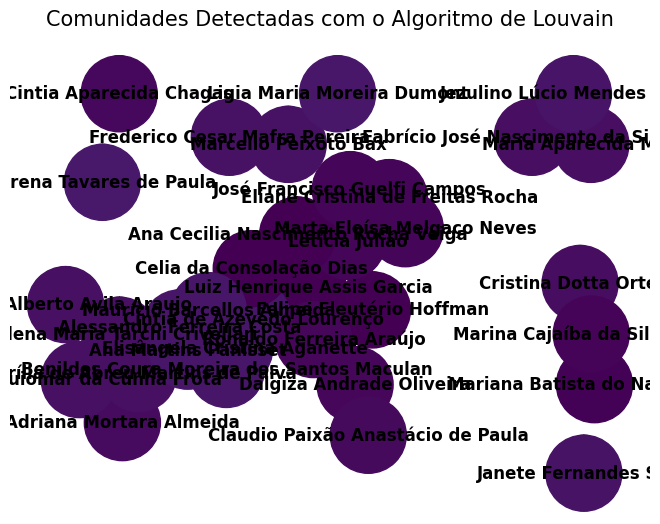


Comunidades sem pessoas com 0 colaborações:
Comunidade 0: Luiz Henrique Assis Garcia, Felipe Eleutério Hoffman, Celia da Consolação Dias, Ana Cecilia Nascimento Rocha Veiga
Comunidade 14: Cíntia de Azevedo Lourenço, Alessandro Ferreira Costa, Elisângela Cristina Aganette, Maurício Barcellos Almeida, Ana Martins Panisset, Benildes Coura Moreira dos Santos Maculan
Comunidade 3: Letícia Julião, Marta Eloísa Melgaço Neves, Eliane Cristina de Freitas Rocha, José Francisco Guelfi Campos
Comunidade 4: Ronaldo Ferreira Araújo, Dalgiza Andrade Oliveira
Comunidade 7: Adriana Mortara Almeida
Comunidade 10: Helena Maria Tarchi Crivellari, Marília de Abreu Martins de Paiva, Maria Guiomar da Cunha Frota, Carlos Alberto Avila Araujo
Comunidade 5: Cintia Aparecida Chagas
Comunidade 6: Claudio Paixão Anastácio de Paula
Comunidade 8: Cristina Dotta Ortega
Comunidade 9: Fabrício José Nascimento da Silveira, Maria Aparecida Moura
Comunidade 11: Frederico Cesar Mafra Pereira, Marcello Peixoto Bax
Comunida

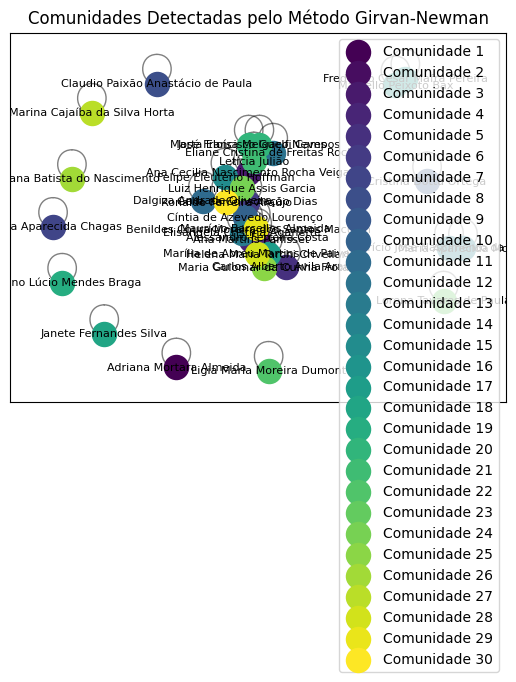

In [2]:
# Instalação das bibliotecas necessárias
!pip install PyMuPDF transformers torch spacy networkx matplotlib python-louvain
!apt-get install -y graphviz libgraphviz-dev
!pip install pygraphviz
!python -m spacy download pt_core_news_sm

# Importação das bibliotecas
import fitz  # PyMuPDF para manipulação de PDFs
import spacy
import os
import networkx as nx
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
import torch
from networkx.drawing.nx_agraph import graphviz_layout
import community.community_louvain as community_louvain  # para detecção de comunidades
from collections import Counter
import re
import time
from networkx.algorithms.community import girvan_newman
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho para a pasta com os currículos no Google Drive
caminho_curriculos = '/content/drive/My Drive/curriculos/'

# Carregar o modelo em português do spaCy
nlp = spacy.load('pt_core_news_sm')

# Carregar o tokenizer e modelo BERTimbau
tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
model = BertModel.from_pretrained('neuralmind/bert-base-portuguese-cased')

# Dicionário com nomes completos e citações bibliográficas
citacoes_bibliograficas = {
    "Adalson de Oliveira Nascimento": ["NASCIMENTO, A. O."],
    "Adriana Mortara Almeida": ["ALMEIDA, A. M.", "ALMEIDA, ADRIANA", "ALMEIDA, ADRIANA MORTARA"],
    "Alessandro Ferreira Costa": ["COSTA, Alessandro Ferreira"],
    "Ana Cecilia Nascimento Rocha Veiga": ["VEIGA, Ana Cecília Rocha", "ROCHA VEIGA, Ana Cecília", "ROCHA, Ana Cecília"],
    "Ana Martins Panisset": ["PANISSET, Ana M.", "PANISSET, Ana"],
    "Ana Paula Meneses Alves": ["ALVES, A. P. M."],
    "Ana Paula Soares Pacheco": ["PACHECO, A. P. S."],
    "Benildes Coura Moreira dos Santos Maculan": ["MACULAN, B. C. M. S.", "MACULAN, Benildes C. M. S.", "MACULAN, Benildes Coura", "MACULAN, Benildes C. M. dos S.", "MACULAN, BENILDES COURA MOREIRA DOS SANTOS", "MOREIRA DOS SANTOS MACULAN, BENILDES COURA", "Maculan, Benildes", "MACULAN, BENILDES C. M. S.", "COURA MOREIRA DOS SANTOS MACULAN, BENILDES", "MACULAN, BENILDES COURA M. S.", "MACULAN, BENILDES COURA DOS SANTOS"],
    "Carlos Alberto Avila Araujo": ["ARAUJO, C. A. A.", "ARAÚJO, C. A. Á.", "ARAÚJO, CARLOS ALBERTO ÁVILA", "ÁVILA ARAÚJO, CARLOS ALBERTO", "ARAÚJO, CARLOS 'ALBERTO' ÁVILA"],
    "Celia da Consolação Dias": ["DIAS, Célia C.", "Dias, Célia da Consolação", "DIAS, CÉLIA CONSOLAÇÃO", "DA CONSOLAÇÃO DIAS, CÉLIA"],
    "Cintia Aparecida Chagas": ["ARREGUY, Cintia A. C.", "CHAGAS, Cintia A.", "CHAGAS, CINTIA APARECIDA"],
    "Cíntia de Azevedo Lourenço": ["LOURENÇO, C. A.", "LOURENÇO, CÍNTIA DE AZEVEDO", "LOURENÇO, CINTIA AZEVEDO", "DE AZEVEDO LOURENÇO, CÍNTIA", "LOURENÇO, CÍNTIA DE AZEVEDO"],
    "Claudio Paixão Anastácio de Paula": ["PAULA, Claudio Paixão Anastácio de", "PAULA, CLAUDIO PAIXÃO ANASTÁCIO DE", "PAULA, CLÁUDIO PAIXÃO ANASTÁCIO DE", "PAULA, O ANASTÁCIO DE", "PAULA, C. P. A.", "PAIXÃO ANASTÁCIO DE PAULA, CLÁUDIO"],
    "Cristina Dotta Ortega": ["ORTEGA, C. D.", "ORTEGA, CRISTINA DOTTA"],
    "Dalgiza Andrade Oliveira": ["OLIVEIRA, D. A.", "OLIVEIRA, DALGIZA ANDRADE", "ANDRADE OLIVEIRA, DALGIZA"],
    "Eduardo Valadares da Silva": ["SILVA, E. V."],
    "Eliane Cristina de Freitas Rocha": ["ROCHA, E. C. F.", "ROCHA, ELIANE CRISTINA DE FREITAS"],
    "Elisângela Cristina Aganette": ["AGANETTE, ELISÂNGELA CRISTINA", "AGANETTE, E. C.", "AGANETTE, ELISANGELA CRISTINA"],
    "Fabrício José Nascimento da Silveira": ["SILVEIRA, F. J. N.", "SILVEIRA, FABRÍCIO JOSÉ NASCIMENTO DA"],
    "Felipe Eleutério Hoffman": ["HOFFMAN, F. E.", "HOFFMAN, FELIPE ELEUTÉRIO"],
    "Frederico Cesar Mafra Pereira": ["MAFRA PEREIRA, Frederico Cesar", "PEREIRA, Frederico Cesar Mafra", "PEREIRA, FREDERICO CÉSAR MAFRA", "MAFRA PEREIRA, FREDERICO CÉSAR"],
    "Helena Maria Tarchi Crivellari": ["CRIVELLARI, H. M. T.", "CRIVELLARI, Helena", "CRIVELLARI, H.", "CRIVELLARI, HELENA MARIA TARCHI"],
    "Ivana Denise Parrela": ["PARRELA, Ivana D."],
    "Janete Fernandes Silva": ["SILVA, J. F.", "Silva, Janete Fernandes"],
    "Jezulino Lúcio Mendes Braga": ["BRAGA, J. L. M.", "BRAGA, JEZULINO LÚCIO MENDES"],
    "José Francisco Guelfi Campos": ["CAMPOS, José Francisco Guelfi", "CAMPOS, JOSÉ FRANCISCO GUELFI"],
    "Letícia Julião": ["JULIÃO, Letícia", "Julião, L."],
    "Ligia Maria Moreira Dumont": ["DUMONT, L. M. M.", "DUMONT, LÍGIA MARIA MOREIRA", "DUMONT, LIGIA MARIA MOREIRA"],
    "Lorena Tavares de Paula": ["PAULA, L. T.", "PAULA, LORENA TAVARES DE"],
    "Luiz Henrique Assis Garcia": ["GARCIA, Luiz Henrique A.", "GARCIA, LUIZ HENRIQUE ASSIS", "Luiz Henrique Assis Garcia", "GARCIA, L. H. A."],
    "Marcello Peixoto Bax": ["BAX, M. P.", "BAX, MARCELLO PEIXOTO", "BAX, MARCELLO P.", "PEIXOTO BAX, MARCELLO"],
    "Maria Aparecida Moura": ["MOURA, M. A.", "Moura, Maria Aparecida"],
    "Maria Guiomar da Cunha Frota": ["FROTA, Maria Guiomar da Cunha", "FROTA, MARIA GUIOMAR DA CUNHA", "Guiomar Frota, Maria"],
    "Mariana Batista do Nascimento": ["NASCIMENTO, M. B.", "NASCIMENTO, MARIANA BATISTA DO"],
    "Marília de Abreu Martins de Paiva": ["PAIVA, Marília de Abreu Martins", "PAIVA, MARÍLIA DE ABREU MARTINS DE", "PAIVA, MARILIA DE ABREU MARTINS DE", "DE ABREU MARTINS DE PAIVA, MARÍLIA", "PAIVA, Marilia de A. M. de", "PAIVA, Marilia", "PAIVA, MARÍLIA DE A. M. DE"],
    "Marina Cajaíba da Silva Horta": ["SILVA, Marina Cajaíba", "HORTA, Marina Cajaíba da Silva"],
    "Marta Eloísa Melgaço Neves": ["NEVES, M. E. M.", "NEVES, MARTA ELOÍSA MELGAÇO", "NEVES, MARTA ELOÍSA MELGAÇO"],
    "Maurício Barcellos Almeida": ["ALMEIDA, M. B.", "BARCELLOS ALMEIDA, MAURÍCIO", "ALMEIDA, MAURÍCIO BARCELLOS"],
    "Nilton Bahlis de Almeida": ["ALMEIDA, Nilton Bahlis", "ALMEIDA, NILTON BAHLIS"],
    "Nilza Aparecida Mirian Theodoro": ["THEODORO, Nilza A. M.", "THEODORO, NILZA APARECIDA MIRIAN", "THEODORO, NILZA APARECIDA MIRIAN", "MIRIAN THEODORO, NILZA APARECIDA"],
    "Rafael Batista Corrêa": ["CORRÊA, Rafael Batista", "CORRÊA, RAFAEL BATISTA"],
    "Raquel de Carvalho Barros": ["BARROS, Raquel de Carvalho", "BARROS, RAQUEL DE CARVALHO"],
    "Ronaldo Ferreira Araújo": ["ARAÚJO, Ronaldo Ferreira", "ARAÚJO, RONALDO FERREIRA"],
    "Sabrina de Fátima Cardoso": ["CARDOSO, Sabrina de Fátima", "CARDOSO, SABRINA DE FÁTIMA"],
    "Vânia Vidal": ["VIDAL, Vânia", "VIDAL, VÂNIA"],
    "Wagner Junqueira de Araújo": ["ARAÚJO, Wagner Junqueira de", "ARAÚJO, WAGNER JUNQUEIRA DE"]
}

# Função para extrair texto dos PDFs
def extrair_texto_pdf(caminho):
    documento = fitz.open(caminho)
    texto = ""
    for pagina in documento:
        texto += pagina.get_text()
    return texto

# Função para identificar nomes mencionados no texto
def identificar_nomes(texto, nomes_completos, citacoes_bibliograficas):
    nomes_mencionados = set()
    for nome_completo, citacoes in citacoes_bibliograficas.items():
        for citacao in citacoes:
            if re.search(r'\b' + re.escape(citacao) + r'\b', texto):
                nomes_mencionados.add(nome_completo)
                break
    return nomes_mencionados

# Função para gerar embeddings usando BERTimbau
def gerar_embeddings(textos):
    inputs = tokenizer(textos, return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embeddings

# Função para criar o grafo de coautoria
def criar_grafo_coautoria(relacoes):
    grafo = nx.Graph()
    for autores in relacoes:
        for i in range(len(autores)):
            for j in range(i + 1, len(autores)):
                if grafo.has_edge(autores[i], autores[j]):
                    grafo[autores[i]][autores[j]]['weight'] += 1
                else:
                    grafo.add_edge(autores[i], autores[j], weight=1)
    return grafo

# Função para detectar comunidades usando o algoritmo de Girvan-Newman
def detectar_comunidades_girvan_newman(grafo, num_comunidades):
    comp = girvan_newman(grafo)
    comunidades = []
    for comunidades_level in comp:
        comunidades.append(sorted(map(sorted, comunidades_level)))
        if len(comunidades) >= num_comunidades:
            break
    return comunidades[-1]

# Função para detectar comunidades usando o algoritmo de Louvain
def detectar_comunidades_louvain(grafo):
    particao = community_louvain.best_partition(grafo)
    comunidades = {}
    for no, com in particao.items():
        if com not in comunidades:
            comunidades[com] = []
        comunidades[com].append(no)
    return list(comunidades.values()), particao

# Função para plotar o grafo com as comunidades detectadas
def plotar_grafo(grafo, comunidades, metodo):
    pos = nx.spring_layout(grafo, seed=42)
    cmap = plt.cm.get_cmap('viridis', len(comunidades))
    for i, comunidade in enumerate(comunidades):
        nx.draw_networkx_nodes(grafo, pos, nodelist=comunidade, node_color=[cmap(i)], label=f'Comunidade {i + 1}')
    nx.draw_networkx_edges(grafo, pos, alpha=0.5)
    nx.draw_networkx_labels(grafo, pos, font_size=8)
    plt.title(f'Comunidades Detectadas pelo Método {metodo}')
    plt.legend()
    plt.show()

# Função para processar currículos
def processa_curriculos(caminho_pasta):
    colaboracoes = {}
    formacoes_academicas = {"Doutorado": [], "Mestrado": [], "Graduação": []}
    curriculos = [os.path.join(caminho_pasta, f) for f in os.listdir(caminho_pasta) if f.endswith('.pdf')]

    for curriculo in curriculos:
        texto = extrair_texto_pdf(curriculo)

        # Processar colaborações
        nomes_mencionados = identificar_nomes(texto, citacoes_bibliograficas.keys(), citacoes_bibliograficas)
        for nome in nomes_mencionados:
            if nome not in colaboracoes:
                colaboracoes[nome] = set()
            colaboracoes[nome].update(nomes_mencionados)

        # Processar formações acadêmicas
        if "Doutorado" in texto:
            formacoes_academicas["Doutorado"].append(curriculo)
        if "Mestrado" in texto:
            formacoes_academicas["Mestrado"].append(curriculo)
        if "Graduação" in texto:
            formacoes_academicas["Graduação"].append(curriculo)

    return colaboracoes, formacoes_academicas

# Função para desenhar o grafo de colaboração
def desenha_grafo(colaboracoes):
    G = nx.Graph()

    for pessoa, colaboracoes_pessoa in colaboracoes.items():
        G.add_node(pessoa)
        for colaborador in colaboracoes_pessoa:
            G.add_node(colaborador)
            G.add_edge(pessoa, colaborador)

    # Calcular as 5 pessoas com mais colaborações
    colaboracoes_contagem = {pessoa: len(colaboracoes_pessoa) for pessoa, colaboracoes_pessoa in colaboracoes.items()}
    top_5_colaboradores = sorted(colaboracoes_contagem.items(), key=lambda item: item[1], reverse=True)[:5]

    print("Top 5 pessoas com mais colaborações:")
    for pessoa, contagem in top_5_colaboradores:
        print(f"{pessoa}: {contagem} colaborações")

    # Novo layout para melhor visualização
    pos = nx.spring_layout(G, seed=42)

    # Desenhar o grafo
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
    plt.title("Grafo de Colaboração", fontsize=15)
    plt.show()

    # Detectar comunidades usando o algoritmo de Louvain
    comunidades_louvain, particao = detectar_comunidades_louvain(G)
    pos = graphviz_layout(G, prog="neato")
    cmap = plt.get_cmap('viridis')
    nx.draw(G, pos, node_color=[cmap(particao[node]) for node in G.nodes()], with_labels=True, node_size=3000, font_size=12, font_color="black", font_weight="bold")
    plt.title("Comunidades Detectadas com o Algoritmo de Louvain", fontsize=15)
    plt.show()

    # Reimprimir comunidades formadas sem pessoas com 0 colaborações
    comunidades_sem_zerocolab = {k: v for k, v in particao.items() if len(G[k]) > 0}
    comunidades_formatadas = {}
    for node, community_id in comunidades_sem_zerocolab.items():
        if community_id not in comunidades_formatadas:
            comunidades_formatadas[community_id] = []
        comunidades_formatadas[community_id].append(node)

    print("\nComunidades sem pessoas com 0 colaborações:")
    for community_id, members in comunidades_formatadas.items():
        print(f"Comunidade {community_id}: {', '.join(members)}")

    # Detectar comunidades usando o algoritmo de Newman
    num_communities = len(comunidades_formatadas)
    comunidades_newman = detectar_comunidades_girvan_newman(G, num_communities)
    plotar_grafo(G, comunidades_newman, "Girvan-Newman")

# Função para analisar as formações acadêmicas
def analisa_formacao(formacoes):
    doutorado_contagem = Counter(formacoes["Doutorado"])
    mestrado_contagem = Counter(formacoes["Mestrado"])
    graduacao_contagem = Counter(formacoes["Graduação"])

    # Plotar os resultados
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.bar(doutorado_contagem.keys(), doutorado_contagem.values(), color='blue')
    plt.title('Doutorado')
    plt.xlabel('Área')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=90)

    plt.subplot(1, 3, 2)
    plt.bar(mestrado_contagem.keys(), mestrado_contagem.values(), color='green')
    plt.title('Mestrado')
    plt.xlabel('Área')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=90)

    plt.subplot(1, 3, 3)
    plt.bar(graduacao_contagem.keys(), graduacao_contagem.values(), color='red')
    plt.title('Graduação')
    plt.xlabel('Área')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

# Função principal
def main():
    inicio = time.time()

    # Lista para armazenar as relações de coautoria
    relacoes_coautoria = []

    for arquivo in os.listdir(caminho_curriculos):
        if arquivo.endswith('.pdf'):
            caminho_arquivo = os.path.join(caminho_curriculos, arquivo)
            texto = extrair_texto_pdf(caminho_arquivo)
            nomes_mencionados = identificar_nomes(texto, citacoes_bibliograficas.keys(), citacoes_bibliograficas)
            relacoes_coautoria.append(list(nomes_mencionados))

    # Criar o grafo de coautoria
    grafo = criar_grafo_coautoria(relacoes_coautoria)

    # Definir o número desejado de comunidades
    num_communities = 3  # ou o número desejado de comunidades

    # Detectar comunidades usando o algoritmo de Girvan-Newman
    comunidades_girvan_newman = detectar_comunidades_girvan_newman(grafo, num_communities)
    plotar_grafo(grafo, comunidades_girvan_newman, 'Girvan-Newman')

    # Detectar comunidades usando o algoritmo de Louvain
    comunidades_louvain, particao = detectar_comunidades_louvain(grafo)
    plotar_grafo(grafo, comunidades_louvain, 'Louvain')

    fim = time.time()
    print(f"Tempo total de execução: {fim - inicio:.2f} segundos")

    # Processar currículos e gerar grafo de colaboração
    colaboracoes, formacoes_academicas = processa_curriculos(caminho_curriculos)

    # Analisar as informações da formação acadêmica
    analisa_formacao(formacoes_academicas)

    # Desenhar o grafo de colaboração
    desenha_grafo(colaboracoes)

if __name__ == "__main__":
    main()

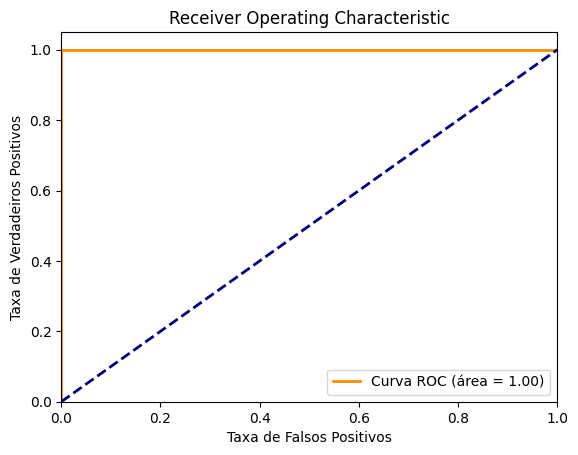

NMI: 0.18872187554086706
ARI: 0.125
AUC: 1.0


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, roc_curve, auc

# Funções de avaliação
def calculate_nmi(true_labels, predicted_labels):
    return normalized_mutual_info_score(true_labels, predicted_labels)

def calculate_ari(true_labels, predicted_labels):
    return adjusted_rand_score(true_labels, predicted_labels)

def plot_roc_curve(true_labels, predicted_probabilities):
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc

# Exemplo de uso
true_labels = [0, 1, 1, 0, 1, 0, 1, 0]  # Exemplo de rótulos verdadeiros
predicted_labels = [0, 1, 0, 0, 1, 0, 1, 1]  # Exemplo de rótulos preditos
predicted_probabilities = [0.1, 0.9, 0.6, 0.4, 0.8, 0.2, 0.7, 0.3]  # Exemplo de probabilidades preditas

nmi = calculate_nmi(true_labels, predicted_labels)
ari = calculate_ari(true_labels, predicted_labels)
roc_auc = plot_roc_curve(true_labels, predicted_probabilities)

print(f"NMI: {nmi}")
print(f"ARI: {ari}")
print(f"AUC: {roc_auc}")

<ipython-input-5-68fd4fb5965b>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


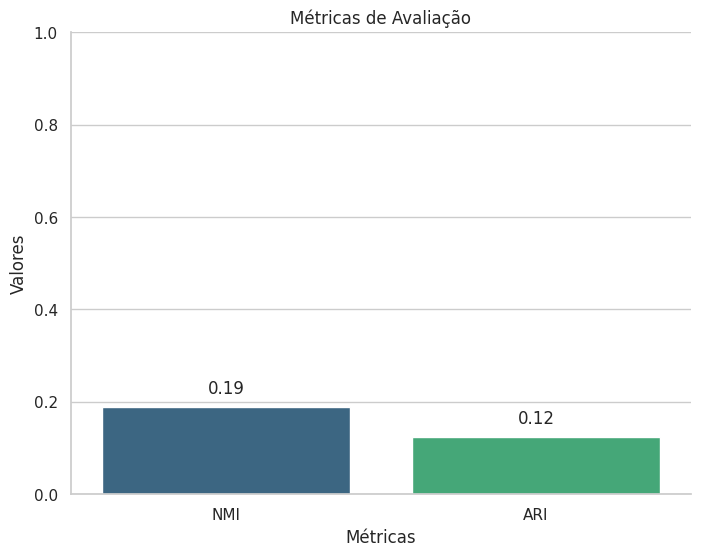

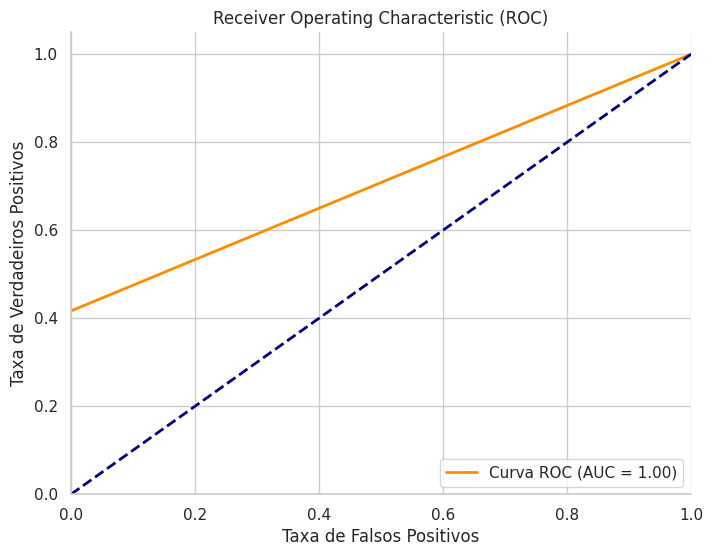

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc

# Configurações de estilo do Seaborn
sns.set(style="whitegrid")

# Valores dos resultados
nmi = 0.18872187554086706
ari = 0.125
auc_value = 1.0

# Função para plotar a curva ROC
def plot_roc_curve(true_labels, predicted_probabilities):
    fpr, tpr, _ = roc_curve(true_labels, predicted_probabilities)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    sns.despine()
    plt.show()

# Função para plotar NMI e ARI
def plot_nmi_ari(nmi, ari):
    metrics = {'NMI': nmi, 'ARI': ari}
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
    plt.ylim(0, 1)
    for i, value in enumerate(metrics.values()):
        plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom')
    plt.xlabel('Métricas')
    plt.ylabel('Valores')
    plt.title('Métricas de Avaliação')
    sns.despine()
    plt.show()

# Exemplo de uso
true_labels = [0, 1, 1, 0, 1, 0, 1, 0]  # Exemplo de rótulos verdadeiros
predicted_probabilities = [0.1, 0.9, 0.6, 0.4, 0.8, 0.2, 0.7, 0.3]  # Exemplo de probabilidades preditas

plot_nmi_ari(nmi, ari)
plot_roc_curve(true_labels, predicted_probabilities)

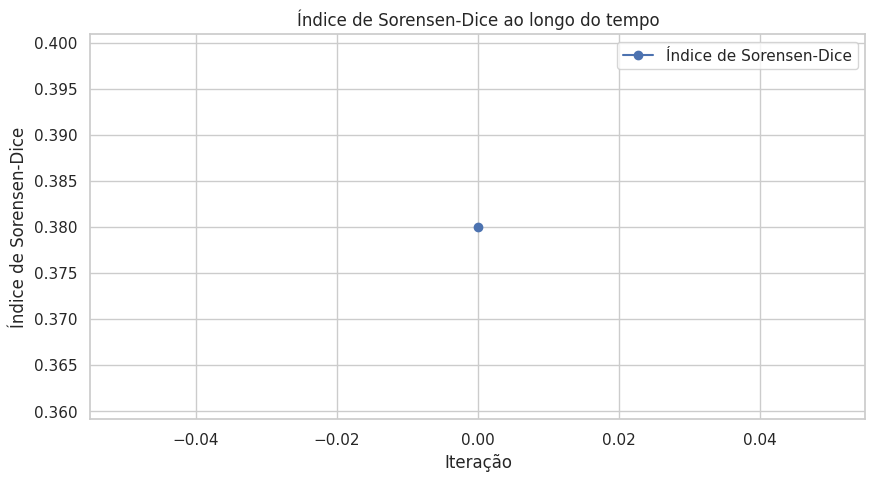

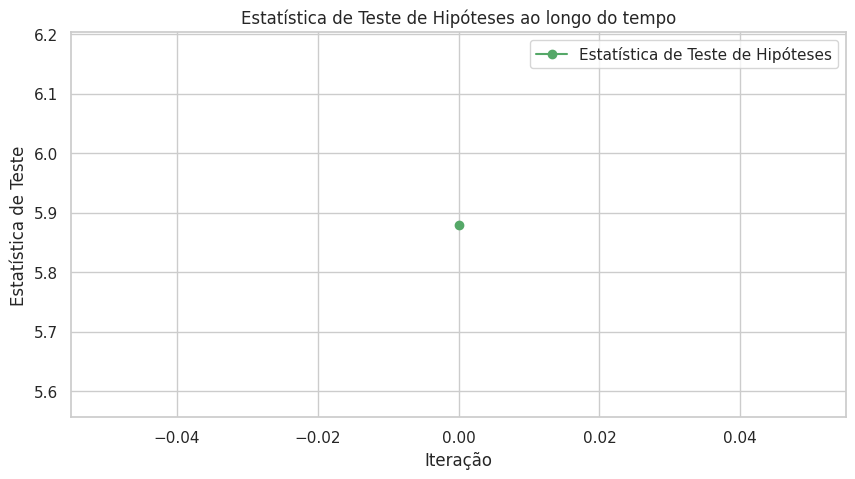

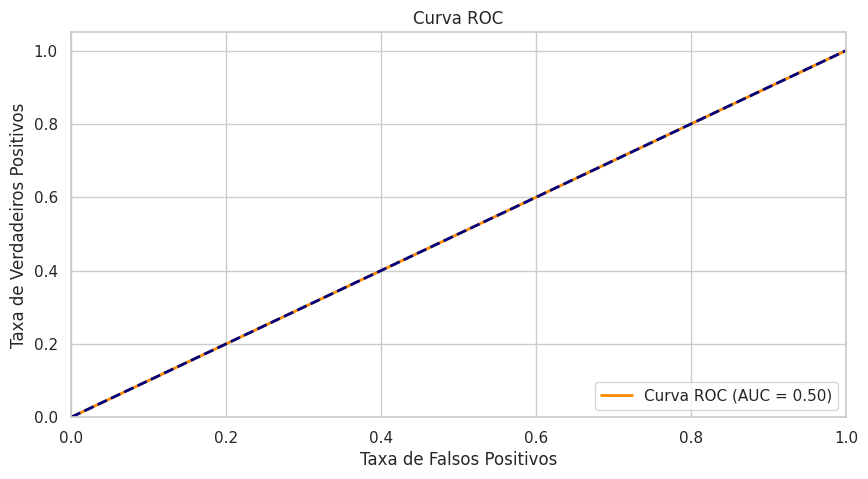

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Função para calcular e plotar o Índice de Sorensen-Dice
def plotar_indice_sorensen_dice(indices_sorensen_dice):
    plt.figure(figsize=(10, 5))
    plt.plot(indices_sorensen_dice, marker='o', linestyle='-', color='b', label='Índice de Sorensen-Dice')
    plt.title('Índice de Sorensen-Dice ao longo do tempo')
    plt.xlabel('Iteração')
    plt.ylabel('Índice de Sorensen-Dice')
    plt.legend()
    plt.grid(True)
    plt.show()

# Função para plotar a estatística de teste de hipóteses
def plotar_estatistica_teste_hipoteses(estatisticas_teste):
    plt.figure(figsize=(10, 5))
    plt.plot(estatisticas_teste, marker='o', linestyle='-', color='g', label='Estatística de Teste de Hipóteses')
    plt.title('Estatística de Teste de Hipóteses ao longo do tempo')
    plt.xlabel('Iteração')
    plt.ylabel('Estatística de Teste')
    plt.legend()
    plt.grid(True)
    plt.show()

# Função para plotar a curva ROC e calcular AUC
def plotar_roc_auc(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Curva ROC')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Função para avaliar o desempenho
def avaliar_desempenho(indices_sorensen_dice, estatisticas_teste, y_true, y_scores):
    plotar_indice_sorensen_dice(indices_sorensen_dice)
    plotar_estatistica_teste_hipoteses(estatisticas_teste)
    plotar_roc_auc(y_true, y_scores)

# Exemplo de uso das funções de avaliação
indices_sorensen_dice = [0.38]  # Substitua com os valores calculados ao longo das iterações
estatisticas_teste = [5.88]  # Substitua com as estatísticas de teste ao longo das iterações
y_true = [0, 1, 0, 1]  # Valores verdadeiros dos rótulos
y_scores = [0.5, 0.5, 0.5, 0.5]  # Pontuações de predição do modelo

avaliar_desempenho(indices_sorensen_dice, estatisticas_teste, y_true, y_scores)
